![Code First: Girls](images/logo_large.png)

#### Python Session 5

## Install SciPy now!

Use the PyCharm terminal

``` python
python -m pip install --user numpy scipy matplotlib ipython jupyter
```

Download files from google drive and save them together into your CFG folder:

‘book_analysis_code.py’ and ‘book_dataset.csv’

All work will be done in the ‘book_analysis_code.py’ file.

### Part 1 (today):
1. String operations and using counter
1. What is SciPy?
1. How to use documentation and searching for answers
1. Try out plotting with Matplotlib

### Part 2 (optional session next week):
1. Introduction to numpy & more Matplotlib


### Dataset- Bookshop sales

We will all work with the book dataset which can be downloaded from Google Drive.

<center><img src="images/data_pic/book_dataset.png" width="1000"></center>

### Loading in the dataset

-The dataset will be read in as a list, where each element in the list is a dictionary.

-Each dictionary contains the data of a single book.

-This includes the name, genre, stock, price and sales for each month.

The file book_analysis_code.py will load the .csv data in for you.

Run this now.

In [16]:
"""Workbook for data analysis session """
import csv

# Open the dataset
with open('book_dataset.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # read the headers of the csv
    headers = reader.fieldnames

    # create list to store the book data
    book_data = []

    # add book data dictionaries to list from .csv
    for row in reader:
        book_data.append(row)

# display the book data list
print(book_data[0]) 

OrderedDict([('Book', 'Blue Moon'), ('Genre', 'Crime'), ('Num_copies_stock', '3'), ('Price', '6.32'), ('Jan', '33'), ('Feb', '14'), ('March', '4'), ('April', '10'), ('May', '15'), ('Jun', '18')])


In [17]:
print(book_data[1])

OrderedDict([('Book', 'Cat in the hat'), ('Genre', 'Children'), ('Num_copies_stock', '2'), ('Price', '3.45'), ('Jan', '14'), ('Feb', '15'), ('March', '20'), ('April', '10'), ('May', '19'), ('Jun', '1')])


### Questions about our dataset:

- How many books of each genre are there?

- What is the current value of all out stock?

- How much revenue did we make each month?

#### How many books of each genre are there?

Solution: Count number of occurrences of each ‘genre’ string for all the books.
<center><img src="images/data_pic/book_dataset.png" width="1000"></center>

How do we do this?
1. Extract a list of all the genres
2. Count the number of occurances of each book genre

#### Example dataset

<center><img src="images/data_pic/animal_data.png" width="300"></center>

#### Step 1 example: Extracting a list from a dictionary

In [3]:
import csv

with open('animal_data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    headers = reader.fieldnames
    animal_data = []

    for row in reader:
        animal_data.append(row)

print(animal_data)

[OrderedDict([('Name', 'Spot'), ('Type', 'Dog')]), OrderedDict([('Name', 'Oliver'), ('Type', 'Cat')]), OrderedDict([('Name', 'Peter'), ('Type', 'Rabbit')]), OrderedDict([('Name', 'Flopsy'), ('Type', 'Rabbit')]), OrderedDict([('Name', 'Mopsy'), ('Type', 'Rabbit')]), OrderedDict([('Name', 'Simba'), ('Type', 'Cat')])]


In [4]:
# Create list to hold all the animal types
all_animals = []

# iterate through dictionary and create a list of all animal types
for animal in animal_data:
    all_animals.append(animal['Type'])
    
print(all_animals)

['Dog', 'Cat', 'Rabbit', 'Rabbit', 'Rabbit', 'Cat']


#### Exercise 5.1: 

Extract a list of genres from the book data.

#### Solution

In [18]:
# Open the dataset- already in your file
with open('book_dataset.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    headers = reader.fieldnames
    book_data = []
    for row in reader:
        book_data.append(row)

In [19]:
# Create an empty list called book_genres
book_genres = []

# Use a for-loop and append each genre to the list
for book in book_data:
    book_genres.append(book['Genre'])

print(book_genres)

['Crime', 'Children', 'Teen', 'Crime', 'Horror', 'Horror', 'Fantasy', 'Children', 'Fantasy', 'Teen', 'Children', 'Action', 'Romance', 'Romance', 'Children', 'Teen', 'Children', 'Children', 'Crime', 'Children', 'Fantasy', 'Crime', 'Romance', 'Teen']


### Step 2: Counter

In [7]:
print(all_animals)

['Dog', 'Cat', 'Rabbit', 'Rabbit', 'Rabbit', 'Cat']


What we want the output to be:

- dog: 1
- cat: 2
- rabbit: 3

```Counter()``` is a function in the collections package.

It can be used to count the number of times an item occurs in a list.

In [8]:
import collections # remember to import the collections package

count_animals = collections.Counter(all_animals) # use the Counter

print(count_animals)

animal_types, type_counts = zip(*count_animals.items()) # convert into animal types and a count of each type.

print(animal_types)
print(type_counts)

Counter({'Rabbit': 3, 'Cat': 2, 'Dog': 1})
('Dog', 'Cat', 'Rabbit')
(1, 2, 3)


#### Exercise 5.2: 

Count the number of books in each genre using the ```Counter()``` method

#### Exercise Solution

In [9]:
# Use the counter method to calculate the number of books in each genre
import collections

genre_collection = collections.Counter(book_genres)

genres, genre_count = zip(*genre_collection.items())

print(genres)

print(genre_count)

('Crime', 'Children', 'Teen', 'Horror', 'Fantasy', 'Action', 'Romance')
(4, 7, 4, 2, 3, 1, 3)


#### Visualising your result

How can we make a plot of the counts of genres? 

Use Matplotlib in the SciPy package!

<center><img src="images/data_pic/animal_count.png" width="500"></center>

### What is SciPy?

<center><img src="images/data_pic/scipy.png" width="800"></center>

#### Introduction to Matplotlib

Matplotlib is a graphing package which is able to produce different types of plots. Including:

<center><img src="images/data_pic/plot_types.png" width="1000"></center>

#### How to import matplotlib

<center><img src="images/data_pic/matplotlib_import.png" width="1000"></center>

#### Creating a bar chart - Plotting the number of animal types

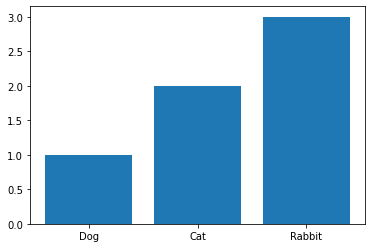

In [12]:
import matplotlib.pyplot as plt # import matplotlib

plt.figure() # create an empty figure

plt.bar(animal_types, type_counts) # create the bar chart

plt.show() # Show the bar chart

<center><img src="images/data_pic/labels_animal_bar.png" width="800"></center>

#### Adding titles and axis labels

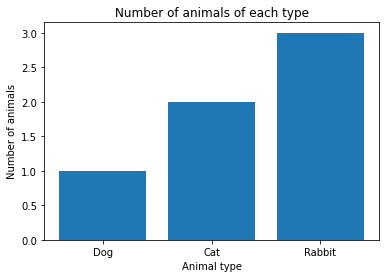

In [13]:
plt.figure()
plt.bar(animal_types, type_counts)

plt.ylabel('Number of animals') # Y axis label

plt.xlabel('Animal type') # X axis label

plt.title('Number of animals of each type') # plot title

plt.savefig('animal_count.png') # Save the figure as a .png file

plt.show()

<center><img src="images/data_pic/final_animal_plot.png" width="700"></center>

**Exercise 5.3:** Create a bar chart of the number of books for each genre. Add suitable axis labels and a title.

Exercise solution

In [ ]:
plt.figure()
plt.bar(genres,genre_count)
plt.ylabel('Number of books')
plt.xlabel('Genre')
plt.title('Number of books of each genre')
plt.savefig('Book_genre_count.png')
plt.show()

<center><img src="images/data_pic/book_genre_count.png" width="700"></center>

## Other types of plots

#### Line plots

What is the weight of our pet rabbit over time?

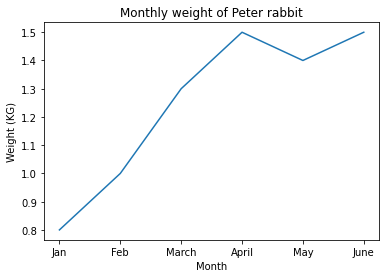

In [14]:
# Create a line plot with weight for each month
weight = [0.8, 1, 1.3, 1.5, 1.4, 1.5]
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June']

plt.figure()
plt.plot(months, weight) # use plt.plot for a line plot
plt.xlabel('Month')
plt.ylabel('Weight (KG)')
plt.title('Monthly weight of Peter rabbit')
plt.savefig('animal_weight.png')
plt.show()

<center><img src="images/data_pic/animal_weight.png" width="700"></center>

#### Scatter plots

Is there any relationship between the weight of a rabbit and how much it eats?

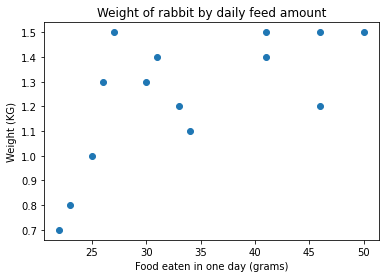

In [15]:
# Create scatter plot of amount of food each rabbit eats and their weight
weight = [0.8, 1, 1.3, 1.2, 1.5, 1.4, 1.5, 0.7, 1.1, 1.3, 1.2, 1.5, 1.4, 1.5]
feed = [23, 25, 30, 33, 41, 31,27, 22,34,26, 46, 46,41, 50]

plt.figure()
plt.scatter(feed, weight) # use plt.scatter for a scatter plot
plt.xlabel('Food eaten in one day (grams)')
plt.ylabel('Weight (KG)')
plt.title('Weight of rabbit by daily feed amount')
plt.savefig('animal_weight_feed.png')
plt.show()

<center><img src="images/data_pic/animal_weight_feed.png" width="700"></center>

### Next time: Using Numpy for data analysis